<div id="container" style="position:relative;">
<div style="float:left"><h1> Hypothesis Testing </h1></div>
<div style="position:relative; float:right">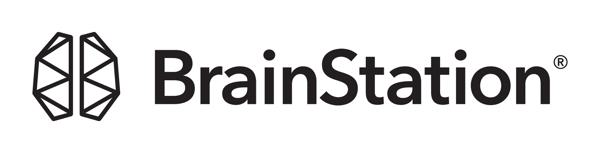
</div>
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm #used for plotting

### What is a Hypothesis Test?

Suppose a new blood pressure medication is in development and we've been asked to test whether or not it has an effect. How might we go about doing this? 

Traditional statistics gives us a framework for making these assessments, called _hypothesis testing_. Hypothesis testing is a rich collection of statistical techniques, several of which we will explore in this program. 

The first step in performing a hypothesis test is, naturally, to set up our hypothesis. Our hypothesis for the blood pressure medication might be something like: "The medication has some effect on blood pressure." 

So we've set our hypothesis for this scenario to be, for example:

* The medication has some effect on blood pressure.

We also create what is called our *Null Hypothesis*:

* The medication has no effect on blood pressure.

For all hypothesis tests, we have a *null hypothesis* $H_0$, and an *alternative hypothesis* $H_1$.

**Hypothesis Test:**

<center> $H_0$: Medicine does nothing. $\;\; vs \;\;$  $H_1$: Medicine does something. </center>

With hypothesis testing, we assume that the Null Hypothesis is true and then gather data to see whether there is enough evidence to disprove this assumption. In our example, we might give one group of patients the medicine and give another group of patients a placebo, then measure the average change in blood pressure of each group. It is only when the difference between the placebo group and the drug group is significantly big enough that we would conclude that the drug has an effect. (We will soon explore how to define what "big enough" means.)

Taking this approach, (assuming no effect and only concluding that there *is* an effect if there is enough evidence), has 2 benefits:
- We make sure not to jump to hasty conclusions based on coincidences in our data
- The hypothesis test actually quantifies the uncertainty in our results


### p-values

One of the outputs of a hypothesis test is a number called a *p-value*. A p-value quantifies the probability of seeing the observed data given that the null hypothesis is true. If the p-value is very low, then seeing the observed data would be very rare if the null hypothesis were true, so we have evidence to reject it.


In our blood pressure example, if we've gathered some sample data from placebo and medicine groups and it turns out the p-value is very low, then we might reject the null hypothesis, conclude that the medicine does have some effect. If the p-value is very high, then there is a high probability of seeing the data that we gathered given the medicine has no effect on blood pressure. (Perhaps any difference in group averages are due to chance.)

How "low" is a low enough p-value to reject the null hypothesis? Traditional statistics has chosen p < 0.05 as a cutoff for 'statistical significance'. If our hypothesis test shows that our values have less than a 1/20 chance to have occurred given the null hypothesis (e.g. medicine has no effect), then we reject our null hypothesis.

Note that p-values are currently considered a little controversial in several fields. The values of p=0.05 were arbitrarily chosen by Ronald Fisher in the 1920s, and if statistics are misapplied, they can be inaccurate. There is also some debate in medical fields, where a p = 0.051 means we might deem a treatment worthless while a p = 0.049 means it might be best practice. Many fields also opt for thresholds for p-values that are much lower than 0.05, because they demand much more confidence that they aren't observing their results due to chance before drawing conclusions.

### Quick Quiz

1. What is a p-value?

  a) The probability of the null hypothesis being true<br>
  b) The probability of the null hypothesis being true given the data you've observed<br>
  c) 0.05<br>
  d) The probability of observing your data given the null hypothesis is true
  
  
2. Which of the following best describes the process of performing a hypothesis test?

  a) Assume the null hypothesis is true. We can **reject** the null hypothesis if the calculated p-value is below the significance threshold.<br>
  b) Assume the null hypothesis is true. We can accept the null hypothesis if the calculated p-value is above the significance threshold.<br>
  c) Assume the alternative hypothesis is true. Pick the desired p-value. Gather data to see whether its average is below that p-value.<br>
  d) Gather some data. Slide to the left. Slide to the right. One hop this time. Check the p-value.

### Categorical vs. Continuous

There are two broad types of variables when looking at data: categorical and continuous.

Continuous variables are those that can take any numerical value - height, weight, income, sales.

Categorical variables are those which fall into a category or class; hair color is often black, blonde, red or brown. Dice rolls are one of the values on the dice. (We can't roll a 3.27, even if that is the expected outcome.)

Categorical outcomes can be ordered, like dice rolls (these are called Ordinals), or unordered, like hair types (these are called Nominals). We can often pool or sum categorical outcomes to be continuous outcomes, like we did last time with the summing of the dice rolls.

Different variables require different tests. We will take the time to explore several.

### Continuous Data: t-Tests

Let's say we have a drug we are testing for blood pressure management, we've given it to a trial group and a placebo group and collected their measurements. What should we do now?

As we have previously learned, when we have a large number of samples, they should approximate the normal distribution. (There are some cases where they may not, which we will discuss in a separate lesson.)

To do this, we can use a t-test, also known as 'Student's t-test'. t-tests were developed by William Gosset, a statistician working on how to determine the quality of Stout produced at the Guinness Brewery in Ireland. He developed his method, but was forbidden to publish it by his bosses at Guinness, so he used the pen name 'Student', which has stuck to the test.

The motivation for this test is to determine whether the data from two sources could have come from the same normal distribution. We compare the mean of two data sets, assume that the variances are equal, and determine whether a single process could have produced both data sets.

Imagine the 2 histograms below are samples of blood pressure levels in people given a drug vs. a placebo, (don't worry about the code here):

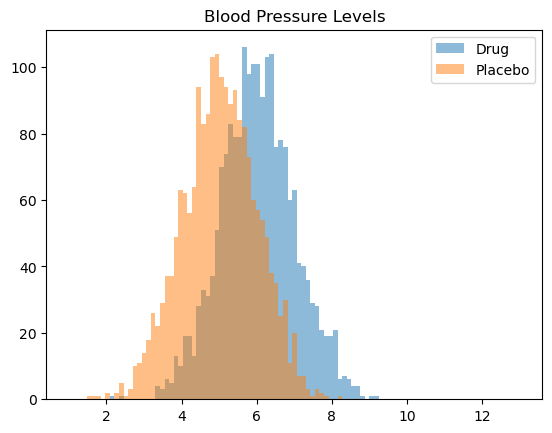

In [2]:
np.random.seed(1234)
drug = np.random.normal(loc = 6, scale = 1, size = 2000)
placebo = np.random.normal(loc = 5, scale = 1, size = 2000)

bins = np.linspace(1, 13, 100)
plt.hist(drug, bins, alpha=0.5, label='Drug')
plt.hist(placebo, bins, alpha=0.5, label='Placebo')
plt.title('Blood Pressure Levels')
plt.legend(loc='upper right');

These definitely seem like 2 normal distributions, but there's a sizable amount of overlap between the 2 curves. Perhaps these samples are all drawn from 1 single normal distribution. So **how can we confirm whether these samples come from different distributions?** This is what t-tests are all about.

We have several different ways of testing difference using t-tests:
* One-Sample t-test = Compare the mean of a measured group to a known mean
* Two-Sample t-test = Compare the mean of one measured group to another measure group

### One-Sample t-Test

Let's say we have a store in a downtown area and one in the suburbs. We want to know if the average spend per customer is different. 

The first test is a one-sample t-test, which takes data and determines if the mean is different from a given value.

**Example:** We are given data about the average spend per customer for 100 customers in one of our stores. We have some information that our competitors have an average spend per customer of 14.5. Does our store have a different average spend than our competitor?

**Notice we know the spend for each of our customers, but we only know the average spend for our competitors**

In this case, we can perform a hypothesis test to compare the mean of the data we have for average spend per customer in our store to our competitor's single value, 14.5.

Hypothesis Test:

<center> $H_0$: $\mu_{Our Store} = 14.5$ $\;\; vs \;\;$  $H_1$: $\mu_{Our Store} \neq 14.5$ </center>

Statistic (in general):

$$ t = \frac{\overline{x} - \mu_{test}}{\left(s\,\big/ \sqrt{n}\right)}$$

Where t is our t-statistic, $\overline{x}$ is our sample mean, µ is the value we are testing against, s is our standard deviation, and n is the size of the sample.

Statistic (in this example): 

$$ t = \frac{\overline{x}_{Our Store} - 14.5}{\left(s_{Our Store}\,\big/ \sqrt{100}\right)}$$

While familiarizing with the formula for the t-statistic can be helpful for understanding, it's not necessary for performing hypothesis tests in Python. Luckily the `stats` package will help us with that!

To perform a one-sample t-test, we pass the data array (`store1`) and the single value that we want to test against (`14.5`) into the `ttest_1samp` function.

In [3]:
store1 = np.array([14.9 , 15.11, 15.25, 14.39, 14.4 , 15.75, 17.13, 14.62, 14.42,
       15.2 , 16.  , 16.41, 15.54, 15.01, 13.66, 15.85, 15.64, 15.78,
       15.37, 14.25, 13.87, 13.28, 15.66, 13.74, 15.94, 14.56, 14.96,
       15.18, 15.27, 15.2 , 15.67, 16.56, 15.48, 15.21, 16.52, 14.03,
       15.29, 15.97, 14.56, 13.42, 15.35, 14.01, 14.94, 16.73, 15.21,
       15.86, 14.09, 14.84, 14.96, 14.01, 14.42, 17.19, 14.89, 17.4 ,
       14.73, 15.36, 15.06, 16.25, 15.41, 16.13, 15.11, 16.22, 15.45,
       14.87, 14.73, 15.03, 14.38, 14.38, 13.94, 16.14, 16.64, 15.38,
       14.05, 16.03, 15.51, 15.75, 15.63, 16.33, 14.9 , 15.07, 14.91,
       17.02, 15.56, 14.13, 12.81, 14.26, 16.36, 15.07, 14.37, 15.42,
       15.24, 16.31, 15.4 , 14.15, 14.29, 14.4 , 15.64, 13.17, 15.32,
       14.71])

In [4]:
np.mean(store1)

15.159700000000003

In [ ]:
one_sample_test = stats.ttest_1samp(store1, 14.5)
print(one_sample_test)

Ttest_1sampResult(statistic=7.203710690696488, pvalue=1.1660253276676903e-10)


We get returned 2 values. The t-statistic is the value calculated from the formula above. The p-value is as defined earlier: the probability of observing this sample of average spend at our store given that the null hypothesis is true, (recall that the null hypothesis is that the true mean in the population is $14.50). 

The p-value is 0.0000000000166... This is very very small, much smaller than our typical cutoff for significant difference (0.05). Under the null hypothesis, we have a 0.00000000166% chance of seeing the results we've observed!

**Conclusion:** This means that we are VERY sure that we can reject the null hypothesis and say that the mean of the average spend per customer in our store is different from $14.50. Hence it is different from our competitor. 

*Reminder: For hypothesis tests, we assume that the null hypothesis is true and then we try to disprove our assumption by looking at the data we have.* 

#### Assumptions of the One-Sample t-Test

- Data points in sample are independent of each other 
- The mean of the sample comes from a normal sampling distribution:
    - Either the sample itself is normally distributed (the population is normally distributed)
    - Or the sample is large enough that the CLT guarantees the sampling distribution is approximately normal 
- The variance of the unknown sample population, (the one we draw our mean from), is the same as our known sample population

### Two-Sample Unpaired t-Test

We are told that the first store is located in the suburbs. Then, we are given data from another store, one that is located in the downtown region. We want to test whether we have different average spends per customer in our two stores.

We can carry out a test where we compare two samples. 

Hypothesis Test:

<center> $H_0$: $\mu_{Suburbs} = \mu_{Downtown} $ $\;\; vs \;\;$  $H_1$: $\mu_{Suburbs} \neq \mu_{Downtown} $ </center>

OR

<center> $H_0$: $\mu_{Suburbs} - \mu_{Downtown}=0 $ $\;\; vs \;\;$  $H_1$: $\mu_{Suburbs} - \mu_{Downtown} \neq 0 $ </center>

<br/> 
t-statistic calculation:

$$ t = \frac{(\overline{X}_1 - \overline{X}_2) - (\mu_1 - \mu_2)}{s_p \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$

Where the $\overline{X}_1$ and $\overline{X}_2$ are the sample means, $(\mu_1 - \mu_2)$ is the population difference you want to test against and $s_p$ is the [pooled standard deviation](https://en.wikipedia.org/wiki/Pooled_variance) of the samples.

For the sake of completeness, $s_p$ is calculated as follows:

$$s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}$$

Where $s_1^2$ and $s_2^2$ are the two sample variances.

Statistic (in our example):

$$ t = \frac{(\overline{X}_{Suburbs} - \overline{X}_{Downtown}) - 0}{s_p \sqrt{\frac{1}{100}+\frac{1}{100}}}$$

and 

$$s_p = \sqrt{\frac{(100 - 1)s_1^2 + (100 - 1)s_2^2}{100 + 100 - 2}}$$

Luckily, we can employ the appropriate function from `scipy`:

In [5]:
# average customer spend for 100 customer for store 1 (located in the suburbs)
store_suburbs = np.array([14.9 , 15.11, 15.25, 14.39, 14.4 , 15.75, 17.13, 14.62, 14.42,
       15.2 , 16.  , 16.41, 15.54, 15.01, 13.66, 15.85, 15.64, 15.78,
       15.37, 14.25, 13.87, 13.28, 15.66, 13.74, 15.94, 14.56, 14.96,
       15.18, 15.27, 15.2 , 15.67, 16.56, 15.48, 15.21, 16.52, 14.03,
       15.29, 15.97, 14.56, 13.42, 15.35, 14.01, 14.94, 16.73, 15.21,
       15.86, 14.09, 14.84, 14.96, 14.01, 14.42, 17.19, 14.89, 17.4 ,
       14.73, 15.36, 15.06, 16.25, 15.41, 16.13, 15.11, 16.22, 15.45,
       14.87, 14.73, 15.03, 14.38, 14.38, 13.94, 16.14, 16.64, 15.38,
       14.05, 16.03, 15.51, 15.75, 15.63, 16.33, 14.9 , 15.07, 14.91,
       17.02, 15.56, 14.13, 12.81, 14.26, 16.36, 15.07, 14.37, 15.42,
       15.24, 16.31, 15.4 , 14.15, 14.29, 14.4 , 15.64, 13.17, 15.32,
       14.71])

# average customer spend for 100 customer for store 2 (located in downtown)
store_downtown = np.array([15.36, 16.07, 15.5 , 15.89, 14.77, 14.55, 14.96, 14.52, 14.81,
       15.84, 16.01, 16.16, 14.41, 15.55, 15.78, 14.82, 16.29, 15.86,
       14.02, 16.01, 17.57, 15.87, 16.11, 15.52, 15.  , 15.37, 15.33,
       16.37, 17.61, 16.11, 15.27, 16.59, 15.37, 16.25, 16.49, 14.93,
       15.02, 14.22, 14.54, 13.37, 15.17, 16.61, 14.79, 15.84, 15.27,
       14.91, 14.83, 16.98, 14.94, 17.32, 14.72, 16.01, 15.06, 14.92,
       16.23, 16.16, 15.05, 16.14, 17.17, 14.36, 15.71, 15.48, 16.27,
       14.54, 15.06, 15.28, 14.55, 13.49, 15.14, 14.57, 16.17, 15.48,
       14.11, 14.63, 16.51, 15.51, 13.06, 15.15, 14.64, 15.15, 15.93,
       15.14, 14.47, 15.1 , 17.11, 15.9 , 15.67, 16.28, 15.4 , 16.32,
       15.73, 15.68, 15.73, 13.01, 14.87, 15.24, 17.48, 16.33, 16.5 ,
       15.9 ])

In [ ]:
stats.

In [ ]:
# we can use the built in function: ttest_ind
two_sample_test = stats.ttest_ind(store_suburbs, store_downtown) 

print(two_sample_test)

Ttest_indResult(statistic=-2.3843100564172697, pvalue=0.01805557370062323)


How do we report this result? We can look at the difference of the means to see which store a higher average customer spend:

In [ ]:
store1_mean = np.mean(store_suburbs) 
store2_mean = np.mean(store_downtown)
print(f'Store 1 (Suburbs) Mean: {store1_mean}')
print(f'Store 2 (Downtown) Mean: {store2_mean}')

Store 1 (Suburbs) Mean: 15.159700000000003
Store 2 (Downtown) Mean: 15.468600000000002


So, store 1 (suburbs) seems to have a lower customer average spend than store 2 (downtown).

We also know that the p-value is significant (0.018 or 1.8%). Standard practice is to report it as:

**Conclusion:** The average customer spend for our suburban store is lower than the average customer spend for our downtown store. With a two-sample t-test, we can reject the null hypothesis with a p-value of 0.018 and conclude that there is a statistically significant difference in average customer spend between our two stores.  


#### Assumptions of the Two-Sample Independent (Unpaired) t-Test
- Data points in each group are independent of each other 
- The means of both samples come from a normal sampling distribution:
    - Either the samples themselves are normally distributed (the populations are normally distributed)
    - Or the samples are large enough that the CLT guarantees the sampling distributions are approximately normal
- Data in group A are independent from data in group B
- Variances of both populations are identical (we can test that assumption)

### Paired Two-Sample t-Test

The third kind of t-test is a 'paired t-test', or a 'repeated measures' t-test. In this case we can add a level of 'structure' to our test.

We use a paired t-test when we have measured each 'subject' in both conditions of our t-test. For example, while we have shown that customers have a different spending in Downtown versus Suburban stores, it might be due to different customers visiting the stores, rather than a difference between spending once they are in the door.

To fix this, **let's imagine that the spending data we have is for the same 100 customers** at both stores. In this case, we have 'repeated measures' of each customer at both stores. Now we can cancel out any difference in customers, as each customer has visited each store. 

So now we are looking at the same 100 people. We send all people first to the suburban store and then to the downtown store and we record their average spend at each store. We want to look at the each individual's average spend difference between the stores and see if these differences are overall around 0.

Hypothesis Test:

<center> $H_0$: $\mu_{diff} = 0$ $\;\; vs \;\;$  $H_1$: $\mu_{diff} \neq 0$ </center><br/>

This time, we derive our t-statistic from the differences between paired samples:

$$ t = \frac{\overline{X_D} - µ_{test}}{\frac{s_D}{\sqrt{n}}} $$

Where $X_D$ is the set of differences between paired samples, $µ_{test}$ is our mean difference that we want to compare to (0 in this case), $s_D$ is difference sample standard deviation, and n is the number of samples.

**REMEMBER**: You should do **either** an unpaired or a paired two-sample t-test, and **not both**. This decision should be made based how your data was collected. 

To reiterate, imagine we were given this data and we were told that 100 random people were selected from store 1 and 100 random people were selected from store 2. In this case we would use an unpaired t-test, which was done in the above section.


NOW, let's say the data collectors made a mistake and they are now telling us that they actually sent the same 100 people to both stores at different times, and that's how the data we got was collected. This means that the previous test is no longer correct. Now we *must* use a paired t-test, as will be demonstrated below. 

In [6]:
# We will first take the differences for each customer
# Here we assume the order of the samples are the same
# So that we are taking adifference for each individual customer
store_suburbs-store_downtown

array([-0.46, -0.96, -0.25, -1.5 , -0.37,  1.2 ,  2.17,  0.1 , -0.39,
       -0.64, -0.01,  0.25,  1.13, -0.54, -2.12,  1.03, -0.65, -0.08,
        1.35, -1.76, -3.7 , -2.59, -0.45, -1.78,  0.94, -0.81, -0.37,
       -1.19, -2.34, -0.91,  0.4 , -0.03,  0.11, -1.04,  0.03, -0.9 ,
        0.27,  1.75,  0.02,  0.05,  0.18, -2.6 ,  0.15,  0.89, -0.06,
        0.95, -0.74, -2.14,  0.02, -3.31, -0.3 ,  1.18, -0.17,  2.48,
       -1.5 , -0.8 ,  0.01,  0.11, -1.76,  1.77, -0.6 ,  0.74, -0.82,
        0.33, -0.33, -0.25, -0.17,  0.89, -1.2 ,  1.57,  0.47, -0.1 ,
       -0.06,  1.4 , -1.  ,  0.24,  2.57,  1.18,  0.26, -0.08, -1.02,
        1.88,  1.09, -0.97, -4.3 , -1.64,  0.69, -1.21, -1.03, -0.9 ,
       -0.49,  0.63, -0.33,  1.14, -0.58, -0.84, -1.84, -3.16, -1.18,
       -1.19])

In [ ]:
stats.ttest_rel(store_suburbs, store_downtown)

Ttest_relResult(statistic=-2.4153163510165245, pvalue=0.017556013707886925)

**Conclusion:** Using the paired t-test, we have successfully been able to reject the null hypothesis. This means that when we sent the same 100 people to both stores, there was a statistically significant difference in their spending in across the two different stores. 

**Quick Summary**:

    Unpaired: testing the differences of means
    Paired: testing the mean of the differences 

#### Assumptions of the Two Sample Paired t-Test

- Data points in group A and B are paired/matched
- The mean of the samples differences comes from a normal sampling distribution
    - Either the samples themselves are normally distributed (the populations are normally distributed)
    - Or the samples are large enough that the CLT guarantees the sampling distributions are approximately normal
- Variances of both populations are identical

*Note: this is the same as a one-sample t-test on the differences between groups A and B*


### Where do p-values come from?

We've looked at their definition, but not yet at how they're calculated. 

Notice how regardless of which type of t-test we were performing, we were returned 2 outputs: the t-statistic and the p-value. The t-statistic is what's calculated using the formulas above (based on mean, standard deviation and sample size). The t-statistic is also a jumping off point for calculating the p-value when combined with the *probability distribution* for the test. 

In this case, it's the t-distribution, which can be approximated by the normal distribution for large enough sample sizes, (n > 30). The p-value is just the area under the curve of this distribution beyond the t-statistic, as visualized below.

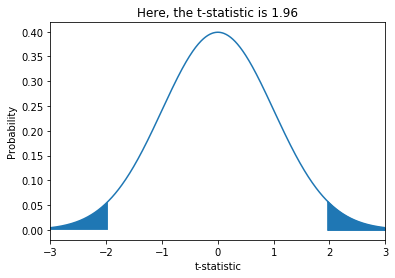

In [ ]:
fill_range = np.arange(-3,-1.96,0.01)
fill_range2 = np.arange(1.96,3,0.01)

xvals = np.arange(-3,3,0.01)

mean=0
sdev=1

plt.figure()
plt.plot(xvals, norm.pdf(xvals, loc = mean, scale = sdev))
plt.xlabel('t-statistic')
plt.ylabel('Probability')
plt.xlim(-3,3)
plt.fill_between(fill_range, norm.pdf(fill_range, loc = mean, scale = sdev))
plt.fill_between(fill_range2, norm.pdf(fill_range2, loc = mean, scale = sdev), color="C0")
plt.title('Here, the t-statistic is 1.96')
plt.show()

Regardless of which type of hypothesis test we're performing, the p-value is calculated by combining the test statistic with the probability distribution related to the test. We evaluate how likely it is to observe a test statistic this extreme or more, given the probability distribution. This is done by finding the area under the curve of the distribution "beyond" where the test statistic falls.

### One Tailed Tests vs. Two Tailed Tests

So far, we have only carried out two tailed tests. This means that for a two-sample t-test, we have been testing whether there was a difference between the means, rather than whether one was higher than the other.

Hence, the p-value that we get is the area under the curve on both sides of the normal curve, as shown in the plot above. 

In the one-sample t-test, if our statistic falls into the critical region of either tail, then we could reject the null hypothesis. The two sample t-test tested the difference in value of the two means, and the paired t-test tested the differences between paired samples. 

If we have a strong reason to suspect that one mean is larger than the other we could do a one tailed test. In this case our null hypothesis changes:

$H_0$: The mean of group $a$ is smaller than, or equal to, the mean of group $b$ ($\mu_a \leq \mu_b$)

and our alternate hypothesis is:

$H_1$: The mean of group a is greater than the mean of group b ($\mu_a > \mu_b$).

This test should ONLY be used if you don't care about detecting differences in the other direction. **A one tailed test is rarely used in practice.**

In the case of one tailed test, our critical region of 0.05 is only located on side, as shown in the plot below, (don't worry about the code). 

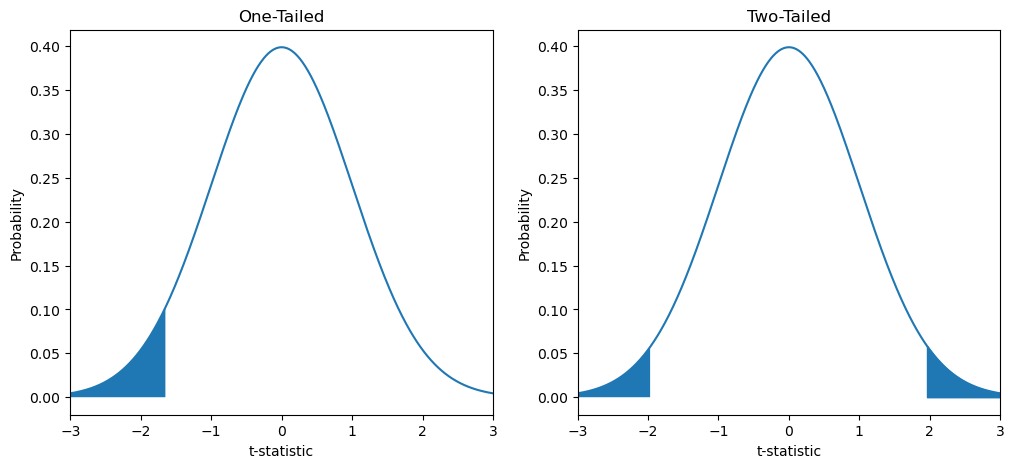

In [7]:
fill_range = np.arange(-3,-1.645,0.01)
fill_range2 = np.arange(-3,-1.96,0.01)
fill_range3 = np.arange(1.96,3,0.01)

xvals = np.arange(-3,3,0.01)

mean=0
sdev=1
plt.subplots(1,2,figsize=(12,5))

plt.subplot(1,2,1) # in my 1x2 grid of plots, what's in slot 1?
plt.plot(xvals, norm.pdf(xvals, loc = mean, scale = sdev))
plt.title("One-Tailed")
plt.xlabel('t-statistic')
plt.ylabel('Probability')
plt.xlim(-3,3)
plt.fill_between(fill_range,norm.pdf(fill_range, loc = mean, scale = sdev))

plt.subplot(1,2,2) # in my 1x2 grid of plots, what's in slot 2?
plt.plot(xvals, norm.pdf(xvals, loc = mean, scale = sdev))
plt.title("Two-Tailed")
plt.xlabel('t-statistic')
plt.ylabel('Probability')
plt.xlim(-3,3)
plt.fill_between(fill_range2,norm.pdf(fill_range2, loc = mean, scale = sdev))
plt.fill_between(fill_range3,norm.pdf(fill_range3, loc = mean, scale = sdev),color="C0")

plt.show()

The critical region will only be one side of the t-curve, which runs the risk that we will fail to detect any extreme values on the other side. This is why we only run this test if we are absolutely sure that values in the other extreme don't matter in our analysis. 

How do we do a one-tailed test in Python? By default, `scipy` only performs two-tailed t-tests, so the p-value it gives back is the area under the curve *on both sides*. 

To run a one-tailed test, we have to make sure the t-statistic has the correct sign, and then we can p-value and halve it. This means that we will be able to reject the null hypothesis much more easily at a significance level of 0.05 when compared to a two-tailed test.

Let's go back to the two stores example, and pretend we want to test that the average spend in the downtown store is larger than the average spend at the suburbs store:

In [8]:
# average customer spend for 100 customer for store 1 (located in the suburbs)
store_suburbs = np.array([14.9 , 15.11, 15.25, 14.39, 14.4 , 15.75, 17.13, 14.62, 14.42,
       15.2 , 16.  , 16.41, 15.54, 15.01, 13.66, 15.85, 15.64, 15.78,
       15.37, 14.25, 13.87, 13.28, 15.66, 13.74, 15.94, 14.56, 14.96,
       15.18, 15.27, 15.2 , 15.67, 16.56, 15.48, 15.21, 16.52, 14.03,
       15.29, 15.97, 14.56, 13.42, 15.35, 14.01, 14.94, 16.73, 15.21,
       15.86, 14.09, 14.84, 14.96, 14.01, 14.42, 17.19, 14.89, 17.4 ,
       14.73, 15.36, 15.06, 16.25, 15.41, 16.13, 15.11, 16.22, 15.45,
       14.87, 14.73, 15.03, 14.38, 14.38, 13.94, 16.14, 16.64, 15.38,
       14.05, 16.03, 15.51, 15.75, 15.63, 16.33, 14.9 , 15.07, 14.91,
       17.02, 15.56, 14.13, 12.81, 14.26, 16.36, 15.07, 14.37, 15.42,
       15.24, 16.31, 15.4 , 14.15, 14.29, 14.4 , 15.64, 13.17, 15.32,
       14.71])

# average customer spend for 100 customer for store 2 (located in downtown)
store_downtown = np.array([15.36, 16.07, 15.5 , 15.89, 14.77, 14.55, 14.96, 14.52, 14.81,
       15.84, 16.01, 16.16, 14.41, 15.55, 15.78, 14.82, 16.29, 15.86,
       14.02, 16.01, 17.57, 15.87, 16.11, 15.52, 15.  , 15.37, 15.33,
       16.37, 17.61, 16.11, 15.27, 16.59, 15.37, 16.25, 16.49, 14.93,
       15.02, 14.22, 14.54, 13.37, 15.17, 16.61, 14.79, 15.84, 15.27,
       14.91, 14.83, 16.98, 14.94, 17.32, 14.72, 16.01, 15.06, 14.92,
       16.23, 16.16, 15.05, 16.14, 17.17, 14.36, 15.71, 15.48, 16.27,
       14.54, 15.06, 15.28, 14.55, 13.49, 15.14, 14.57, 16.17, 15.48,
       14.11, 14.63, 16.51, 15.51, 13.06, 15.15, 14.64, 15.15, 15.93,
       15.14, 14.47, 15.1])

Now our hypotheses will be:

<center> $H_0$: $\mu_{Downtown} \leq \mu_{Suburbs} $ $\;\; vs \;\;$  $H_1$: $\mu_{Downtown} > \mu_{Suburbs} $ </center>

We will use our two sampled unpaired t-test, but we will be careful to first provide the arguments as `store_downtown`, and then `store_suburbs`

In [11]:
two_sample_test = stats.ttest_ind(store_downtown, store_suburbs, equal_var=False)
print(two_sample_test)

Ttest_indResult(statistic=1.8098713238651718, pvalue=0.07200125482964628)


Notice our p-value is higher than the threshold of 0.05. However, that is the two tailed value!

We notice our t-statistic is positive (t = 1.8) which means that $\mu_{Downtown} > \mu_{Suburbs}$, and so we can halve our p-value to the one tailed value of 0.036, which is lower than our threshold of 0.05.

---

#### Exercise 1

#### Part 1

We are investigating the time spent on our website by a group of visitors. We would like to know if the amount of time spent in seconds is different than our competitor, who has published the mean time spent as 120 seconds.

We have data for 100 of our website visitors:


In [13]:
time_spent = np.array([139.43, 106.18, 158.65, 123.75, 115.59, 147.74, 147.19, 117.27,
       130.31,  85.15, 153.  , 149.84, 149.07,  89.57, 123.32, 130.04,
       138.11, 135.78, 156.42,  99.06, 125.95, 116.88, 133.87, 141.07,
       156.36, 120.61, 143.51,  93.66, 126.34, 151.18, 122.04, 136.75,
       150.95, 150.92, 147.27, 127.56, 132.49, 123.54, 146.83, 177.82,
       131.52, 118.67, 130.72,  88.5 , 134.96, 112.06, 127.26, 130.37,
       145.11, 134.31, 146.82, 101.08, 101.96, 127.98, 119.04, 127.11,
       137.08, 129.29, 141.31, 160.91, 110.52, 128.59, 136.16, 125.83,
       150.68,  81.99, 170.61, 107.15, 134.24, 144.09, 114.29, 139.24,
       144.08, 140.47, 111.47, 170.16, 134.54, 106.95, 142.64, 130.79,
       139.29,  58.73, 156.42, 133.05, 133.29, 121.4 , 145.35, 149.7 ,
       135.42, 157.84, 131.6 , 122.  , 109.44, 118.31, 146.33, 128.36,
       123.1 , 140.57, 108.62, 119.76])

1. Plot the time spent on the website as a histogram.

2. Choose an appropriate t-test to carry out to determine if time spent on our website is different from our competitors. What is the Null hypothesis? What is the Alternative hypothesis?

3. Perform the test. Do we accept or reject the Null hypothesis?

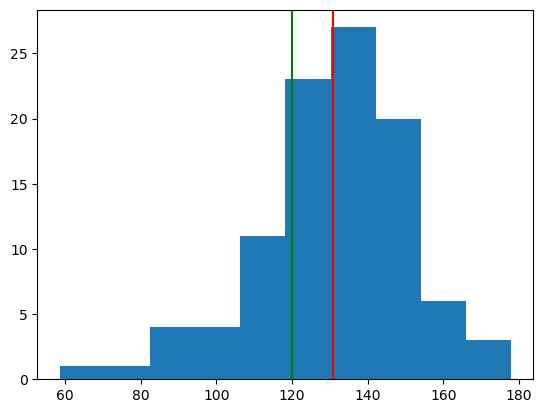

In [16]:
#Q1

#plt.figure()
plt.hist(time_spent)
plt.axvline(np.mean(time_spent), color='r', label='website 1')
plt.axvline(120, color='green', label='competitor mean')
plt.show()

In [23]:
np.mean(time_spent)

130.70200000000003

Null Hypothesis: average time spent on website = 120

Alt Hypothesis: the average time spent on website != 120

In [18]:
#Q2
result = stats.ttest_1samp(time_spent, 120)

In [20]:
result

Ttest_1sampResult(statistic=5.347286869284019, pvalue=5.746880238630438e-07)

#### Conclusion: We reject the null hypothesis with a p-val very close to 0. The probability of observing our sample GIVEN that the null hypothesis is true is 0.00000057. 

#### Part 2
We then decide to redesign our site to try and increase time spent. We have some new data from 100 different users:

In [21]:
time_spent2 = np.array([142.82, 148.33, 147.07, 142.71, 146.69, 164.27, 121.38, 127.64,
       161.49, 111.38, 154.51, 102.79, 127.98, 151.98, 132.92, 133.36,
       150.61, 100.63, 137.94, 144.9 , 132.03, 124.65, 123.34, 145.73,
       102.94, 144.87, 127.41, 131.02, 150.88, 150.57, 141.79, 140.02,
       153.32, 174.87, 149.79, 117.76,  95.29, 175.6 , 102.29, 161.21,
       152.95, 129.4 , 151.05, 119.99, 160.54, 126.51, 151.02, 156.68,
       134.57, 184.32, 146.92, 152.93, 127.52, 135.87, 164.16, 120.9 ,
        94.53, 130.33, 119.27, 143.68, 147.74, 122.12, 130.6 , 118.68,
       119.81, 141.52, 149.58, 140.73, 156.05, 156.76, 135.55, 125.99,
       118.24, 112.22, 139.79, 132.54, 179.47, 139.45, 108.81, 165.46,
        94.04, 110.05, 144.27, 136.7 , 162.45, 108.01, 113.09, 125.16,
       128.71, 108.48, 141.19, 125.14, 107.54, 119.07, 159.09, 128.37,
       133.78, 154.78, 142.77, 115.97])

In [22]:
np.mean(time_spent2)

135.9969

As we spent a lot of money and time to upgrade to web best practices, we decide to run a one tailed t-test.


1. Carry our a t-test to determine whether or not our average website visit time has increased. What are the Null and Alternative hypotheses?

2. Do we reject the Null hypothesis? Do you agree with running a one tailed test? How does the result differ in a two tailed test?

3. Assume that the data here is actually from the same 100 users, in the same order. Carry out a paired t-test.

4. Do we have more evidence that our redesign changed user behaviour?



## Null Hypothesis: average time for SITE 2 <= SITE1
## ALT: average time for SITE2 > SITE1


In [24]:
#let's look at the variance
np.var(time_spent)

396.55015199999997

In [25]:
np.var(time_spent2)

383.02805938999995

In [26]:
#1 we need two sample ONE TAILED t-test

two_sample_test = stats.ttest_ind(time_spent2, time_spent, equal_var=True)
print(two_sample_test)

Ttest_indResult(statistic=1.8868853539240746, pvalue=0.060639087044405966)


In [27]:
#showing what happens when we set equal_var = False

two_sample_test = stats.ttest_ind(time_spent2, time_spent, equal_var=False)
print(two_sample_test)

Ttest_indResult(statistic=1.8868853539240746, pvalue=0.06063952780774533)


In [30]:
#how do we interpret these results?

pval = (two_sample_test[1] / 2)

In [31]:
print(f'With a P-value of {pval}, we will reject the null hypothesis that the average time spent on website 1 is >= the average time spend on website 2. ')

With a P-value of 0.030319763903872664, we will reject the null hypothesis that the average time spent on website 1 is >= the average time spend on website 2.


In [32]:
#Q3
#Null: There is no difference between time spent on website 1 vs 2
#Alt: There IS a difference between time spend on websites 1 vs 2

stats.ttest_rel(time_spent, time_spent2)

Ttest_relResult(statistic=-1.970233789552684, pvalue=0.05160495115792341)

In [33]:
#Q4

With a pvalue > 0.05, we do not have enough evidence to reject null hypothesis that there is a statistically significant difference in time spent on each website for 100 users (of both websites). 

---

### Categorical Data: Chi Squared Test

When the data we want to make inferences about is categorical, we use a Chi Squared test, a.k.a. $\chi^2$ test (pronounced "Kai squared", not "Chee squared").

A perfect example is rolling dice. A dice roll is great for demonstration of the $\chi^2$ test because we know everything about the population distribution. 

The probability distribution for a fair dice roll is: 

| Outcome     |  1  |  2  |  3  |  4  |  5  |  6  |
| ----------- |:---:|:---:|:---:|:---:|:---:|:---:|
| Probability | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

If a dice is unbiased, we would expect each outcome to have 1/6 of the total rolls. Based on this, we know exactly what we should expect when we take a sample from the population. The sample in this scenario is a few rolls from the dice we are testing.


We will now simulate some data to reflect a biased dice. We can think of this as having a loaded dice or a chipped dice, which throws off the balance of the dice.

To set up a higher bias for rolling a 6, we need to include an additional argument to the `np.random.choice` function. This needs to be a list of probabilities for all of the outcomes we are choosing from and the probabilities must add up to 1.

The population probabilities for our loaded dice will be:

| Outcome     |  1  |  2  |  3  |  4  |  5  |  6  |
| ----------- |:---:|:---:|:---:|:---:|:---:|:---:|
| Probability | 0.164 | 0.164 | 0.164| 0.164 | 0.164 | 0.18 |

If we randomly sample from a population with the above probabilities, we should see more 6's being rolled as we increase the number of rolls we make. 

Let's simulate 2000 rolls from our biased dice. 

#### Simulating Dice Rolls

In [37]:
1/6

0.16666666666666666

In [34]:
# Setting up a higher bias for rolling a 6
possiblerolls = range(1,7)

probs = np.array([0.164, 0.164, 0.164, 0.164, 0.164, 0.18])

print(probs) 
print(probs.sum())

[0.164 0.164 0.164 0.164 0.164 0.18 ]
1.0


In [35]:
np.random.seed(12345)

# to simulate rolls with biased dice, we provide an argument for p
biased_rolls = np.random.choice(possiblerolls, replace = True, size = (2000), p = probs)

print(biased_rolls)

[6 2 2 ... 4 6 4]


array([6, 2, 2, ..., 4, 6, 4])

We have our list of simulated rolls, now how do we check how many of each outcome we rolled? 

We will use the `collections` package. If you Google "How do i count occurrences of items in a list in Python?", this is what it'll tell you to do.

In [38]:
from collections import Counter

count_biased = Counter(biased_rolls)

print('Biased:', count_biased)

Biased: Counter({6: 362, 2: 336, 5: 335, 3: 334, 4: 318, 1: 315})


The output of the counter is a dictionary, with the outcomes as keys and the counts as values. The order of the items printed to screen is determined by the counts. 

**Remember**: Knowing that one of the dice is biased is our luxury here. In a real world scenario, we would NOT know if a dice is biased. We would just get some counts based on a sample. Based on the counts above, we might be suspicious that the 6 is more common than the other outcomes. Hence, we might think that the dice is biased and decide to do some testing.

#### Looking for Bias using Hypothesis Test

To test whether our dice is fair, we'll perform a $\chi^2$ test. It's a hypothesis test designed to assess whether there's a statistically significant difference between the observed counts and the expected counts across a set of mutually exclusive categories.

Hypothesis Test:

<center> $H_0$: The dice are fair $\;\; vs \;\;$  $H_1$: The dice are loaded </center>


**Important**: 

In a hypothesis test, always
- Assume that the null hypothesis is true
- Look at some sample data and get a measure of how far away our sample data is from what we expect, given the null hypothesis is true
- If the sample data is too different from what we expected, then our initial assumption might  be wrong

For our example, if the null hypothesis is true, the *expected* counts for 2000 rolls would be: 

|    Outcome  |  1  |  2  |  3  |  4  |  5  |  6  |
| ----------- |:---:|:---:|:---:|:---:|:---:|:---:|
|    Counts   | 333.33 | 333.33 | 333.33 | 333.33 | 333.33 | 333.33 |

The above expected counts come from the fact that if a dice is unbiased (null hypothesis), then all outcomes are equally likely to occur. So, out of 2000 rolls, each outcome should occur $2000/6=333.33$ times. 

Our *observed* sample counts (from counter dictionary) are: 

|    Outcome  |  1  |  2  |  3  |  4  |  5  |  6  |
| ----------- |:---:|:---:|:---:|:---:|:---:|:---:|
|    Counts   | 315 | 336 | 334 | 318 | 335 | 362 |

We now need a way to quantify how much our expected and observed counts differ. 

We can do that using the $\chi^2$ statistic.

**Test Statistic**:

$$ \chi^2 = \sum_{k=1}^6\frac{(obs_k - exp_k)^2}{exp_k} $$

We take the observed counts minus the expected counts for each roll, square it, and divide by the expected. We then sum the results of all numbers.

Let's calculate the test statistic for our biased dice rolls:

In [39]:
expected = 1/6*2000

chisq = 0

for i in range(1,7):
    observed = count_biased[i]
    chisq += ((observed - expected)**2)/expected
    
print(chisq)

4.21


What does this value mean? We will explore that, but before we do that, let's work on our Python skills!

---
#### Exercise 2
1. Turn the above into a function, that takes the parameters `counts`, the counter dicts, `size` the size of the sample, and returns the chi square statistic
2. Document your function! Add a docstring, with examples.
3. Add assertions, to make sure you are taking in the expected data types.
---

In [105]:
# Exercise 2 Solution

def my_chisq_calc(counts, size):
    '''
    Compute the Chi squared test statstic given counts of a categorical experiment


    Parameters
    ----------
    counts: dictionary type object
        Dictionary of counts for each categorical output

    size: float
        Size of the sample


    Returns
    -------
    my_chisq: float
        Returns a single value for the chisq

    Examples
    --------
    >>> counts = {6: 362, 2: 336, 5: 335, 3: 334, 4: 318, 1: 315}
    >>> size = 2000
    >>> my_chisq_calc(counts, size)
    4.21

    '''
    # Assert types
    assert isinstance(counts, dict), "counts parameter should be of type dictionary" 
    assert isinstance(size, int), "size parameter should be of type int" 

    expected = (1/len(counts.keys()))*size

    my_chisq = 0

    for key in counts.keys():
        obs = counts[key]
        my_chisq += ((obs - expected)**2)/expected

    return my_chisq

The Chi Squared statistic is a measure of bias in our dice. The value itself doesn't carry much meaning unless we convert it into the corresponding p-value.

Recall, the p-value is the probability that we are observing the sample data given that the null hypothesis is true. For our dice example, the p-value is the probability that we see the observed counts assuming that the dice is unbiased.

To calculate the p-value, we compare our test statistic to the Chi Squared distribution, finding the area under the curve for anything greater than the test statistic, like in the following plot:

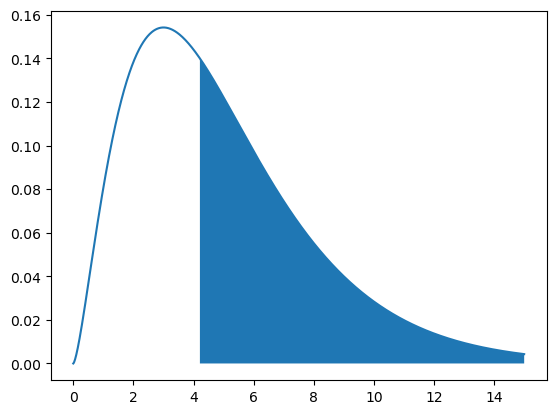

In [42]:
x = np.arange(0,15,0.01)
y = stats.chi2.pdf(x, 5)

fill_x = np.arange(4.21,15,0.01)
fill_y = stats.chi2.pdf(fill_x, 5)

plt.figure()
plt.plot(x,y)
plt.fill_between(fill_x, fill_y)
plt.show()

To calculate it, we can use the `chisquare` method built into the `stats` package.

In [43]:
# First we need to put our observed counts into a list
# because this is how the chisquare function takes the argument
count_biased_list = [count_biased[i] for i in possiblerolls]


stats.chisquare(count_biased_list)

Power_divergenceResult(statistic=4.21, pvalue=0.5195942907852373)

In [44]:
count_biased_list

[315, 336, 334, 318, 335, 362]

What does the p-value mean again?

If we assume that the dice is unbiased (all outcomes are equally likely), then there is a probability of 52% that we would see the observed counts. 

This is a very high probability, meaning that we have little evidence to believe our alternative hypothesis.

**Conclusion**: We cannot reject the null hypothesis. We cannot conclude that the dice is biased.

.

.

.

Hmmm... but we *know* that the dice *was* biased because we designed it that way! This leads to the idea of statistical power. Sometimes a statistical test cannot detect subtle biases if our sample size isn't large enough — remember, there is always randomness involved.

*Important Note*: Just because I can't prove that the dice is biased, it doesn't mean it's unbiased. It just means that with this sample of data, I couldn't see enough evidence to conclude that the dice is biased. 

### A Dice With a Stronger Bias
What if we our bias was stronger? Imagine we have a really crooked die which has an even bigger chip and is even more likely to fall on six. If we roll this dice 2000 times, will we be able to detect the bias?

| Outcome     |  1  |  2  |  3  |  4  |  5  |  6  |
| ----------- |:---:|:---:|:---:|:---:|:---:|:---:|
| Probability | 0.162 | 0.162 | 0.162| 0.162 | 0.162 | 0.19 |

In [45]:
np.random.seed(12345)

# adding a higher bias to the 6
prob2 = np.array([0.162, 0.162, 0.162, 0.162, 0.162, 0.19])
print(prob2)

# Simulate the rolls and count up the results                                                                           

[0.162 0.162 0.162 0.162 0.162 0.19 ]


In [46]:
# Convert the counts into a list
count_biased_list2 = [count_biased2[i] for i in possiblerolls]

# Run the test
stats.chisquare(count_biased_list2)

Power_divergenceResult(statistic=11.866000000000001, pvalue=0.036670745046782215)

In [47]:
count_biased_list2

[312, 327, 336, 315, 322, 388]

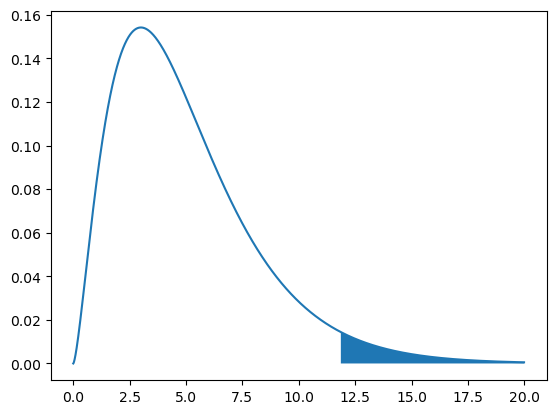

In [50]:
x = np.arange(0,20,0.01)
y = stats.chi2.pdf(x, 5)

fill_x = np.arange(11.866000000000001,20,0.01)
fill_y = stats.chi2.pdf(fill_x, 5)

plt.figure()
plt.plot(x,y)
plt.fill_between(fill_x, fill_y)
plt.show()

Now we can reject the Null Hypothesis - this particular dice is not fair.

### Testing for Independence across Multiple Categories

We can carry out Chi Squared tests across multiple categorical variables as well. For example, we might ask whether peoples' favorite color is related to their favorite fruit. Or whether there's a statistically significant relationship between someone's country of residence and the industry that they work in. 

A Chi-Squared test for independence tells us whether data is distributed across multiple variables as expected, or whether there is a statistically significant relationship between two categorical variables.

For a Chi-Squared test for independence, our hypotheses are:

$H_0$: There is no relationship between the categorical variables. (They are independent.)

$H_1$: There is _some_ relationship between the categorical variables. (They are not independent.)

Essentially we're trying to figure out whether knowing the value of one categorical variable will help us predict the other.

Let's investigate whether BrainStation has a difference in student course preferences across different campuses. Our null hypothesis is that there is no difference in course preferences in different places. Data is in the table below.

NB. This is not real enrollment data!

|Location | Web Dev | UX Design | Data Science |
|---------|---------|-----------|--------------|
|New York |  100    |   150     |  75          |
|London   |   60    |    70     |  70          |


With these location-course counts, we want to determine whether the observed counts are different from the expected counts if the variables were independent. While we might have more students in UX than Web Dev overall, or more students in New York than London overall, if location and course were independent, we'd expect the courses to have similar proportions across the different campuses.

Let's create a DataFrame for our data:

In [62]:
data = {'Web Dev': [100,60], 'UX Design':[150,70], 'Data Science':[75,70]}

df = pd.DataFrame(data, index=['New York', 'London'])
display(df)

,Web Dev,UX Design,Data Science
New York,100,150,75
London,60,70,70


In [70]:
ExpectedLondonWebDev = ((60+70+70)*(100+60)) / (100+150+75+60+70+70) 

In [71]:
ExpectedLondonWebDev

60.95238095238095

This type of table is called a contingency table, and we can run our Chi Squared test by passing this table into the `chi2_contingency()` function:

In [63]:
stats.chi2_contingency(df)

(10.072416807330594,
 0.006498340751512512,
 2,
 array([[ 99.04761905, 136.19047619,  89.76190476],
        [ 60.95238095,  83.80952381,  55.23809524]]))

The function returns a tuple of values. The first 2 are ones we've seen before: the Chi squared statistic and the p-value.

__Conclusion:__ With a p-value of 0.006, we can reject the null hypothesis that the location of a student and their course preference are independent. It appears that there is some relationship between location and course preference.

The other 2 values returned are the degrees of freedom and an array of expected values. These help inform the calculations that lead to the p-value. The degrees of freedom for this type of test is $(m-1)\cdot(k-1)$ where $m$ and $k$ are the number of categories in the course and location variables, respectively. The array of expected values shows us the expected frequency in each cell of our contingency table, given the overall counts of New York students vs. London students, and the overall counts of Web Dev, UX and Data students.

__Discussion:__ Comparing the observed frequencies in our actual data and the expected frequencies array, can we see where the observed deviates from the expected?

---
#### Exercise 3

1. Make the table into Web Dev vs. Non-Web Dev students and re-run the test. What is the p-value now?

In [57]:
data = {'Web Dev': [100,60], 'Non Web-Dev':[225,140]}

df1 = pd.DataFrame(data, index=['New York', 'London'])
display(df1)

,Web Dev,Non Web-Dev
New York,100,225
London,60,140


In [64]:
#Re run the chi square contingency test
stats.chi2_contingency(df1)

(0.007801180518967367,
 0.929618932351838,
 1,
 array([[ 99.04761905, 225.95238095],
        [ 60.95238095, 139.04761905]]))

In [59]:
100/60

1.6666666666666667

In [60]:
225/140

1.6071428571428572

### Conclusion: With a p-value of 0.92, we do not have enough evidence to reject the null hypothesis that there is no relationship between location and bootcamp discipline.

2. Imagine we take a survey of adult and child preferences toward Pepsi and Coke. We asked 500 people total, 60% of whom were adults and 40% of whom were children. The adults preferred Coke at a 2:1 ratio and the children were evenly split between Coke and Pepsi. Construct the contingency table and run a Chi Squared test to see whether there is a significant relationship between a person's age and their soft drink preference.

In [66]:
num_adults = 300
num_children = 200

In [67]:
pepsi_adults = 200
coke_adults = 100

pepsi_children = 100
coke_children = 100

In [68]:
data_soda = {'Pepsi': [pepsi_adults, pepsi_children], 'Coke':[coke_adults, coke_children]}

In [69]:
df_soda = pd.DataFrame(data_soda, index=['Adults', 'Children'])
display(df_soda)

,Pepsi,Coke
Adults,200,100
Children,100,100


In [ ]:
#Chi Square Test

#Null Hyp: There is no relationship between age and soda preference
#Alt Hyp: There is SOME relationship between age and soda

In [72]:
stats.chi2_contingency(df_soda)

(13.203125,
 0.0002794827113761392,
 1,
 array([[180., 120.],
        [120.,  80.]]))

In [73]:
(300*200) / 500

120.0

### Expected Totals:  (ROW TOTAL * COLUMN TOTAL) / TOTAL NUMBER OF OBSERVATIONS

---

#### Assumptions of the Chi-Squared Test

- The data in the cells should be frequencies.
- The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
- Each subject may contribute data to one and only one cell.
- The study groups must be independent.


### Activity: In-Class Hypothesis Tests

An old educator had 2 very strong hunches about human heights. One was that Mac-users are taller than PC-users on average, and the other was that pet-owners and non-pet-owners have different heights on average. Let's test these hypotheses!

1. Take a moment individually to write out the Null and Alternative hypotheses for each test.
2. Which type of hypothesis test is appropriate for each of these two experiments?
3. Let's gather the data necessary to perform these tests. Measure your height and share it with the educators along with the groups that you belong to. We should now have a sample of heights for Mac-users & PC-users, as well as samples for pet-owners and non-pet-owners.
4. As a class, carry out the hypothesis tests to find the p-values. What conclusions can we draw?

In [ ]:
#null: there is no relationship between height / computer choice AND pet ownership / computer choice

In [76]:
data = {'Pet Owner': [10, 0], 'Non Pet Owner':[60,30]}

df1 = pd.DataFrame(data, index=['MAC', 'PC'])
display(df1)

,Pet Owner,Non Pet Owner
MAC,10,60
PC,0,30


In [77]:
stats.chi2_contingency(df1)

(3.306878306878307,
 0.06899043148251478,
 1,
 array([[ 7., 63.],
        [ 3., 27.]]))

### Multiple Testing

So far we have covered basic statistical hypothesis testing when we have categorical data (Chi Squared Test), as well as continuous data (t-test). 


Let's talk about a few errors that can come up when running these tests.

#### Type 1 and Type 2 Errors

When we incorrectly reject or do not reject a null hypothesis, we are making an error.

In statistical terms, these are type I and type II errors.

| Decision       | $H_0$ true|   $H_0$ false |
| ------------- |:-------------:| -----:|
| Reject $H_0$ | Type I |Correct|
| Do not reject $H_0$  |Correct|Type II|

A **type I error** is a 'false positive'; we have rejected the null hypothesis, and posited an effect where there is not one. In other words we reject $H_0$ when $H_0$ is actually true.
When we say that we are testing at the 5% significance level in a t-test, we are saying that we will accept at most a 5% chance of a false positive (Type I error). We look for a p-value that is less than 0.05 as the p-value gives us the probability that the result we found happened by random chance.


*Examples*: 
- Telling someone they are sick when they are not
- Pull the fire alarm when there is no fire
- Getting a positive pregnancy test when you are not pregnant


It's important to ensure that our assumptions are met because the test statistics we use to calculate the final p-value are based on these assumptions. When they don't hold, it can be shown that the real false positive rate when running these test may be higher than we expect! This will lead us to make false conclusions. 


A **type II error** is a 'false negative'; we have failed to reject the null hypothesis when it was not true.

*Examples*: 
- Telling someone they aren't sick when they are
- Not pulling the fire alarm when there is a raging fire
- Getting a negative pregnancy test when you are pregnant


It is useful to try and remember this terminology, we will loop back to it later during the machine learning section of the program.

#### Performing Multiple Tests

So far, with t-tests we have covered tests between single groups. What if we have to test between a lot of different groups? 

One approach might be to test each subgroup against the null hypothesis. This approach actually brings some problems. Consider the following example.

**Example:**
Do jelly beans cause acne? (http://xkcd.com/882)


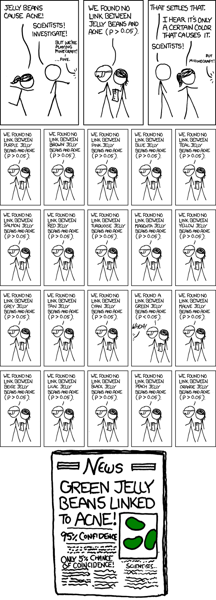
<center><i>(Image Source: <a>https://xkcd.com/882/</a>)</i></center>

Remember what a p-value means. We already have a 5% (or 1/20) chance of a false positive, (i.e. incorrectly rejecting the null hypothesis when it is in fact true). 

As we increase the number of tests we perform, we increase our risk of incorrectly concluding that we see a significant difference in our data.

One way of avoiding making these false positive (Type I Errors) is to change our threshold for p-value significance, thereby making the test more conservative.

There are a few ways to make the test more conservative. We want to somehow reduce the overall threshold for significance,  $\alpha_{overall}$, which is usually set at 0.05.

**Bonferroni Correction**

With this method, we define a new significance threshold for our hypothesis tests such that:

$$ \alpha_{test} = \frac{\alpha_{overall}}{ \text{number of tests}}. $$

When we have many tests, however, the p-values for the individual tests can become very small and cause us to be too strict. This means that we can easily miss cases when we should have rejected the null hypothesis, inflating our type II error. 

**Holm-Bonferroni Method**

The significance threshold for each individual test with this method is:
$$ \alpha_{test} = \frac{\alpha_{overall}}{ \text{number of tests}-\text{rank number of p-value} +1}, $$

where the rank number of the p-value is the rank when p-values are sorted from smallest to largest. Notice that the individual significance thresholds will be different for every test. 

To decide whether or not to reject the null hypotheses for each test, we walk down our ranking of p-values until we find the first one whose p-value is _above_ its significance threshold. All hypothesis tests before this point will have their null hypotheses rejected and all others will _not_ have their null hypotheses rejected.

For more information on the Holm-Bonferroni Method, start with the following link:

https://www.statisticshowto.datasciencecentral.com/holm-bonferroni-method/


There is no hard and fast rule about multiple testing. In general, we have better statistical tests to carry out when we are testing multiple values.

P-hacking is heavily frowned upon, but somewhat common in scientific research. [A good story focuses on a Cornell Professor Brian Wansink](https://www.buzzfeed.com/stephaniemlee/brian-wansink-cornell-p-hacking), who published work showing, for example, that a larger size plate leads to eating more at a buffet. He has been heavily criticized for his p-hacking.

We will discuss other approaches to testing with multiple values next week.

### Supplementary - Multiple Testing Demonstration

We are given data on the effect on acne by 20 different coloured jelly beans. 

For each jelly bean colour, we have a sample of 30 people, on which a number was recorded. Let's assume this number signifies a change in acne surface area for a person. 

Going into this analysis, we assume that jelly beans do not affect acne, so we should not expect any significant results. This will be ensured by randomly generating data to our liking.

The hypothesis test for each one of the jelly bean colours will be: 


<center> $H_0$: $\text{Change in Acne Surface Area} = 0$ $\;\; vs \;\;$  $H_1$: $\text{Change in Acne Surface Area}  \neq 0$ </center>

Again, since this is artificially generated data that is centered around 0, none of the tests should come back statistically significant.

Let's see what happens...

In [79]:
mycolours = np.array(['forestgreen', 'darkturquoise', 'gray', 'plum', 'wheat',
       'darkgoldenrod', 'darkorange', 'salmon', 'darkgrey', 'purple',
       'red', 'papayawhip', 'lightcyan', 'lightsteelblue', 'seashell',
       'ghostwhite', 'lightseagreen', 'darkslategrey', 'darkseagreen',
       'thistle'])

In [80]:
# randomly generating data for the 20 colours
# we are generating all values to be around 0
np.random.seed(2345)
data = {}
for i in mycolours:
    x = np.random.normal(loc = 0, scale = 1, size = 30)
    data[i] = x

In [81]:
data

{'forestgreen': array([-0.95129875,  1.7687718 , -1.14182693,  0.71075487,  0.51095064,
         1.14902943, -0.53846023, -0.73664509, -0.07599648,  0.84881782,
         0.64978329, -0.57121168, -0.91415833, -0.12351978,  0.28163352,
         0.79561195,  0.17939442,  1.20200685,  0.37181545, -0.29008358,
         0.38357096,  0.60297078, -0.19130985, -2.01223047, -0.32439576,
         0.24454674,  0.01723267,  0.12892893, -1.42599074,  0.20573325]),
 'darkturquoise': array([-0.18243054,  1.63689203, -0.23546445, -1.86462954,  2.78460254,
        -0.99783017, -1.14748429,  1.45805452,  0.14287285,  0.13830444,
         1.37754136, -1.63959301,  0.94788749, -1.95466782,  0.34600589,
        -0.51373307, -1.267691  , -0.60154652,  1.20539515,  0.57016601,
        -1.15224615, -1.11624811, -0.56809486, -0.48562992,  0.32153166,
        -0.19752395,  0.99593476, -0.34949669, -1.69342634, -1.12865327]),
 'gray': array([ 2.20211489, -1.51831049, -2.16244234,  0.13361129,  0.8027773 ,
       

We will carry out 20 individual hypothesis tests to see if any of the jelly bean colours have a significant effect on acne increase.

In [82]:
# here we do 20 individual t-tests
print('Significance level is 0.05 \n')

for i in data.keys():
    pvalue = stats.ttest_1samp(data[i], 0)[1]
    print(i, round(pvalue,3))
    if pvalue < 0.05:
        print(f'***colour {i} has a signficant effect on acne!')

Significance level is 0.05 

forestgreen 0.869
darkturquoise 0.425
gray 0.827
plum 0.065
wheat 0.042
***colour wheat has a signficant effect on acne!
darkgoldenrod 0.366
darkorange 0.338
salmon 0.979
darkgrey 0.463
purple 0.425
red 0.841
papayawhip 0.605
lightcyan 0.669
lightsteelblue 0.632
seashell 0.677
ghostwhite 0.454
lightseagreen 0.909
darkslategrey 0.796
darkseagreen 0.565
thistle 0.239


Even though we generated all data from the same distribution, so it should be very similar across all colours, we get one significant test result! 

Remember, every time we run a test with a significance level of 0.05, we are leaving 5% room for error. So if we do 20 tests, we expect 5% of tests (or 1 test) to return a significant result. 

So, do we have something wrong here? Not really, it is working as expected. We expect 1 false positive (Type I error) in a sample of 20 tests.

To reduce these, we can do an error correction on our tests.

The most basic is the 'Bonferroni Correction'. In this method we simply divide the significance threshold by the number of tests we have carried out:

In [85]:
print(f'With the Bonferroni correction, the significance threshold is now 0.05/20={0.05/20} \n')
for i in data.keys():
    pvalue = stats.ttest_1samp(data[i], 0)[1]
    print(i, round(pvalue,3))
    if pvalue < 0.05/20:
        print(f'***colour {i} has a signficant effect on acne!')
### no significant results!

With the Bonferroni correction, the significance threshold is now 0.05/20=0.0025 

forestgreen 0.869
darkturquoise 0.425
gray 0.827
plum 0.065
wheat 0.042
darkgoldenrod 0.366
darkorange 0.338
salmon 0.979
darkgrey 0.463
purple 0.425
red 0.841
papayawhip 0.605
lightcyan 0.669
lightsteelblue 0.632
seashell 0.677
ghostwhite 0.454
lightseagreen 0.909
darkslategrey 0.796
darkseagreen 0.565
thistle 0.239


This runs the risk of inflating our false negatives (Type II errors)! If one of the jellybean colours actually _did_ cure acne, we might miss it! 

**Let's imagine 'wheat' and 'forestgreen' jellybeans really do cure acne**. This means that if we were given data from experiments, the values for difference in acne surface area should be larger for the wheat and forestgreen coloured jelly beans. We can easily simulate this. 

In [86]:
np.random.seed(2345)
data2 = {}
for i in mycolours:
    if i == 'wheat':
        x = np.random.normal(loc = 0.25, scale = 1, size = 30)
        data2[i] = x
    elif i == 'forestgreen':
        x = np.random.normal(loc = 0.474, scale = 1, size = 30)
        data2[i] = x
    else:
        x = np.random.normal(loc = 0, scale = 1, size = 30)
        data2[i] = x

Here, we intentionally make the data concerning the wheat and forestgreen colour come from a different distribution, simulating the fact that these jellybean colours cause a difference in acne surface area.

Let's perform our hypothesis tests using the Bonferroni correction: 

In [87]:
print(f'With the Bonferroni correction, the significance level is {0.05/20} \n')
for i in data.keys():
    pvalue = stats.ttest_1samp(data2[i], 0)[1]
    print(i,round(pvalue,10))
    if pvalue < 0.05/20:
        print(f'***colour {i} has a signficant effect on acne!')

With the Bonferroni correction, the significance level is 0.0025 

forestgreen 0.0025256734
darkturquoise 0.425418934
gray 0.8267323736
plum 0.0647731182
wheat 0.0023596862
***colour wheat has a signficant effect on acne!
darkgoldenrod 0.3663828035
darkorange 0.3375815556
salmon 0.978819012
darkgrey 0.4627765415
purple 0.4254552188
red 0.840505781
papayawhip 0.6047905013
lightcyan 0.6686750323
lightsteelblue 0.6315658255
seashell 0.6768420646
ghostwhite 0.4540260397
lightseagreen 0.9092907908
darkslategrey 0.7955820185
darkseagreen 0.5647218124
thistle 0.2388600428


We only detect the wheat coloured jellybean! We have now committed a type II error. We have a treatment that does work (forestgreen), but we have missed it due to our stringent cutoff.

We will now apply the Holm-Bonferroni correction.

In [88]:
# First we need to order the p-values and we have to make sure to keep the name
# of the colour along with the p-value
pvalues = []
for i in data.keys():
    pvalue = stats.ttest_1samp(data2[i], 0)[1]
    pvalues.append((pvalue, i))


pvalues = sorted(pvalues, key = lambda x: x[0])
pvalues

[(0.002359686202335408, 'wheat'),
 (0.002525673439284377, 'forestgreen'),
 (0.06477311815143173, 'plum'),
 (0.2388600428242516, 'thistle'),
 (0.3375815555858215, 'darkorange'),
 (0.3663828035286809, 'darkgoldenrod'),
 (0.4254189340476635, 'darkturquoise'),
 (0.42545521879057, 'purple'),
 (0.4540260396921435, 'ghostwhite'),
 (0.46277654146812874, 'darkgrey'),
 (0.5647218124355735, 'darkseagreen'),
 (0.6047905012857966, 'papayawhip'),
 (0.6315658255354891, 'lightsteelblue'),
 (0.6686750322756202, 'lightcyan'),
 (0.6768420645840648, 'seashell'),
 (0.7955820184559776, 'darkslategrey'),
 (0.8267323735881693, 'gray'),
 (0.8405057809537523, 'red'),
 (0.9092907907870931, 'lightseagreen'),
 (0.9788190119818798, 'salmon')]

Now we can apply our correction:

In [89]:
# We check each p-value with the appropriate significance level

results = pd.DataFrame()
colours=[]
pvals = []
significance = []

counter = 1
for i,j in pvalues:
    colours.append(j)
    pvals.append(i)
    significance.append(0.05/(20-counter+1))
    if i < 0.05/(20-counter+1):
        print(f'***{j} is significant')
    counter += 1

results['colours'] = colours
results['pvalues'] = pvals
results['significance'] = significance


***wheat is significant
***forestgreen is significant


In [90]:
results

,colours,pvalues,significance
0,wheat,0.002360,0.002500
1,forestgreen,0.002526,0.002632
2,plum,0.064773,0.002778
3,thistle,0.238860,0.002941
4,darkorange,0.337582,0.003125
5,darkgoldenrod,0.366383,0.003333
6,darkturquoise,0.425419,0.003571
7,purple,0.425455,0.003846
8,ghostwhite,0.454026,0.004167
9,darkgrey,0.462777,0.004545


With the Holm-Bonferroni correction, we now compare the forestgreen p-value of 0.002526 to a significance threshold of $\alpha=0.002632$ (rather then $\alpha= 0.05/20 = 0.0025$ as with Bonferroni). Hence, our threshold is less stringent and we don't make the type II error. 

--- 

#### Exercise 5

Our competitors for our retail stores have published that their average spend per visit is \$5.50. We have data for five of our own stores, and want to test if they are significantly different from our competitors store.

1. Which test should we use? Is the test one tailed or two tailed?
2. We have the data as below:

In [100]:
np.random.seed(1234)
means = [5.5, 5.3, 5.7, 5.5, 5.5] # means for random generation of data for our 5 stores
stores = ['store1','store2','store3','store4','store5']

data = {}
for i in range(len(stores)): 
    data[stores[i]] = np.random.normal(loc = means[i], scale = 1, size = 100)   

In [101]:
#We should run two-tailed one sample t-test (no correction)

# here we do 20 individual t-tests
print('Significance level is 0.05 \n')

for i in data.keys():
    pvalue = stats.ttest_1samp(data[i], 5.5)[1]
    print(i, round(pvalue,3))
    if pvalue < 0.05:
        print(f'*** the average spend of store {i} is different from $5.50')

Significance level is 0.05 

store1 0.726
store2 0.013
*** the average spend of store store2 is different from $5.50
store3 0.0
*** the average spend of store store3 is different from $5.50
store4 0.275
store5 0.034
*** the average spend of store store5 is different from $5.50


In [102]:
#get ordered list of pvalues for HOLM Bonferroni

pvalues = []
for i in data.keys():
    pvalue = stats.ttest_1samp(data[i], 5.5)[1]
    pvalues.append((pvalue, i))


pvalues = sorted(pvalues, key = lambda x: x[0])
pvalues

[(0.00034411300000240384, 'store3'),
 (0.012520884272373453, 'store2'),
 (0.03392491400334704, 'store5'),
 (0.2750818498418085, 'store4'),
 (0.7264262605275402, 'store1')]

In [103]:
# We check each p-value with the appropriate significance level

results = pd.DataFrame()
stores=[]
pvals = []
significance = []

counter = 1
for i,j in pvalues:
    stores.append(j)
    pvals.append(i)
    significance.append(0.05/(20-counter+1))
    if i < 0.05/(20-counter+1):
        print(f'***{j} is significant')
    counter += 1

results['colours'] = stores
results['pvalues'] = pvals
results['significance'] = significance


***store3 is significant


In [104]:
results

,colours,pvalues,significance
0,store3,0.000344,0.002500
1,store2,0.012521,0.002632
2,store5,0.033925,0.002778
3,store4,0.275082,0.002941
4,store1,0.726426,0.003125


   Carry out the appropriate test on each sample. How many type I errors do we expect? How many do we get?

3. What are the critical p-values (or significance levels) under the Boferroni and Holm-Bonferroni corrections?

4. How many significant values do we get under both corrections?


---

### Supplementary  -  Non-Parametric Statistics

When you are faced with the following two problems:
   - Your sample is non-normally distributed.
   - The sample size is too small. Which means you cannot rely upon the result of the CLT that states that the distribution of sample means taken from any random population distribution will approach normal as $n$ increases.

It is not appropriate to run a parametric test such as the t-test. Instead we must look towards a group of testing methods known as non-parametric tests.

Non-parametric tests generally do not make assumptions that your variables come from a particular distribution and have less stringent requirements. Instead, they work by ranking values and comparing ranks (although there are many other methods). They are extremely useful when analyzing data that may not have an underlying distribution, like ranking of movies in order of preference, or cases where we know that the relationship between variables is not normal.



We have non-parametric alternatives for a range of tests. In general they are less [powerful](https://en.wikipedia.org/wiki/Power_of_a_test) and more likely to produce a Type II error, but they are more robust in scenarios where the assumptions of a parametric test do not hold.

**Parametric Test Alternatives:**

| Parametric test  | Non-Parametric test  |
|:---:|:---:|
| One-Sample t-test | [One-Sample Wilcoxon Signed Rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) or [One-Sample Sign test](https://en.wikipedia.org/wiki/Sign_test)   | 
| Two Sample Paired t-test | [Wilcoxon Signed Rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) | 
| Two Sample Unpaired t-test | [Mann-Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) |
| Pearson's Correlation  | [Spearman's Rank Correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) |  

For most cases there are different options you could use, however the examples in the above table are the most commonly used non-parametric test alternatives.

---

<div id="container" style="position:relative;">
<div style="position:relative; float:right">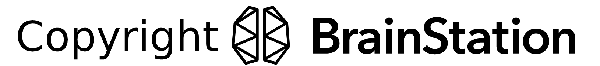
</div>
</div>